<img src="https://raw.githubusercontent.com/DHI/mikepluspy/main/images/logo/mikeplus-py.svg" alt="image" width="400">

# Example 5 - Run and modify MIKE+ models

#### Run MIKE+ model

In [1]:
from mikeplus import DataTableAccess
from mikeplus.engines import Engine1D

In [2]:
# Open MIKE+ database

dta = DataTableAccess("data/simple_model.sqlite")
dta.open_database()
dta

<DataTableContainer>
Db major version: 2024
Db minor version: 0.0
Active model: CS_MIKE1D
Unit system: MU_CS_SI
Active simulation: my_simulation

In [3]:
# Run simulation

engine = Engine1D(dta.datatables)
engine.run()

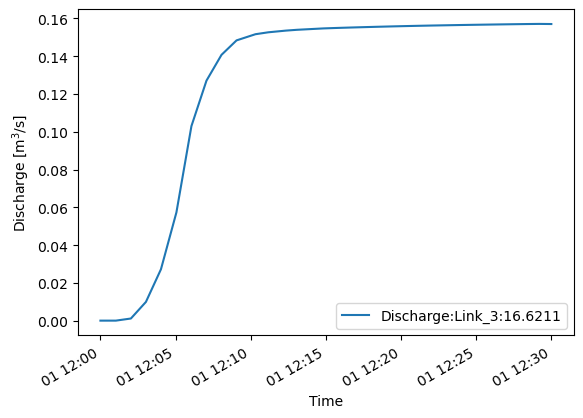

In [4]:
# Plot discharge of last pipe

from mikeio1d import Res1D

res = Res1D("data/my_simulationBaseDefault_Network_HD.res1d")
res.reaches['Link_3'].Discharge.plot();

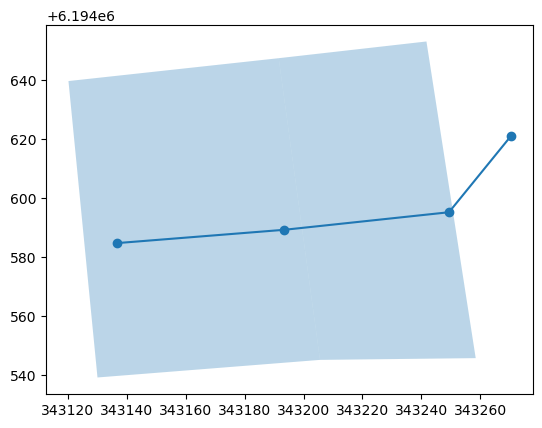

In [5]:
# Plot network for context

res_catch = Res1D("data/my_simulationBaseDefault_Surface_runoff.res1d")
ax = res.network.to_geopandas().plot()
res_catch.network.to_geopandas().plot(ax=ax, alpha=0.3);

#### Modify MIKE+ model

In [6]:
# Update constant rainfall value

dta.set_value(
    table_name = 'msm_BBoundary',
    muid = 'Rainfall',
    column = 'ConstantValue',
    value = 25 / 1000 / 3600 # 50mm/hr as m/s
)

In [7]:
# Run model again

engine.run()

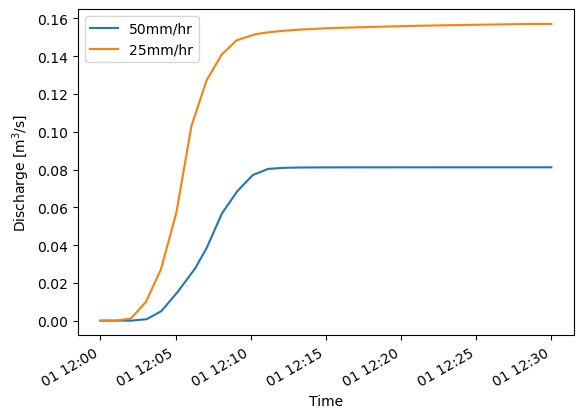

In [8]:
# Plot the new results

res_new = Res1D("data/my_simulationBaseDefault_Network_HD.res1d")
ax = res_new.reaches["Link_3"].Discharge.plot()
res.reaches["Link_3"].Discharge.plot(ax=ax)
ax.legend(["50mm/hr", "25mm/hr"]);

#### Run many simulations

In [9]:
# Create function for updating constant rainfall

def update_rainfall(new_rainfall):
    dta.set_value(
    table_name = 'msm_BBoundary',
    muid = 'Rainfall',
    column = 'ConstantValue',
    value = new_rainfall / 1000 / 3600 # 50mm/hr as m/s
    )

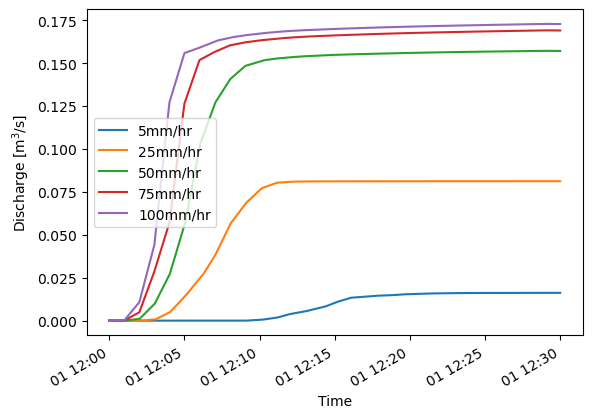

In [10]:
# Run several rainfalls, plotting the result for of each

rainfalls = [5, 25, 50, 75, 100]

ax = None

for rainfall in rainfalls:
    update_rainfall(rainfall)
    engine.run()
    res = Res1D("data/my_simulationBaseDefault_Network_HD.res1d")
    ax = res.reaches["Link_3"].Discharge.plot(ax=ax)

ax.legend([f"{rainfall}mm/hr" for rainfall in rainfalls])

#### Update pipe diameters

In [11]:
# Update pipe diameters

links = ['Link_1', 'Link_2', 'Link_3']
for link in links:
    dta.set_value(
        table_name = 'msm_Link',
        muid = link,
        column = 'Diameter',
        value = 0.6 # in meters, originally 0.3m
    )

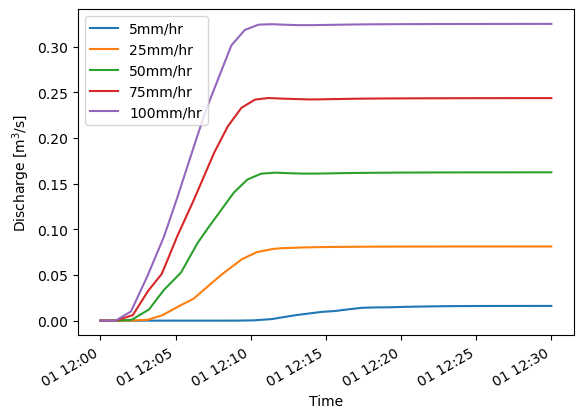

In [12]:
# Run same simulations and plots as above

rainfalls = [5, 25, 50, 75, 100]

ax = None

for rainfall in rainfalls:
    update_rainfall(rainfall)
    engine.run()
    res = Res1D("data/my_simulationBaseDefault_Network_HD.res1d")
    ax = res.reaches["Link_3"].Discharge.plot(ax=ax)

ax.legend([f"{rainfall}mm/hr" for rainfall in rainfalls]);